In [124]:
import numpy as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv(r'datasets/HeathAttackPrediction/heart.csv')

In [126]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [127]:
# categoricos
cat = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
#numerico
num = ['age','trtbps','chol','thalachh','oldpeak','output']

In [128]:
data.isna().nunique()

age         1
sex         1
cp          1
trtbps      1
chol        1
fbs         1
restecg     1
thalachh    1
exng        1
oldpeak     1
slp         1
caa         1
thall       1
output      1
dtype: int64

In [129]:
data.isnull().nunique()

age         1
sex         1
cp          1
trtbps      1
chol        1
fbs         1
restecg     1
thalachh    1
exng        1
oldpeak     1
slp         1
caa         1
thall       1
output      1
dtype: int64

In [130]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [132]:
data.nunique()[ (data.nunique()>2) & (data.nunique()<5)].index

Index(['cp', 'restecg', 'slp', 'thall'], dtype='object')

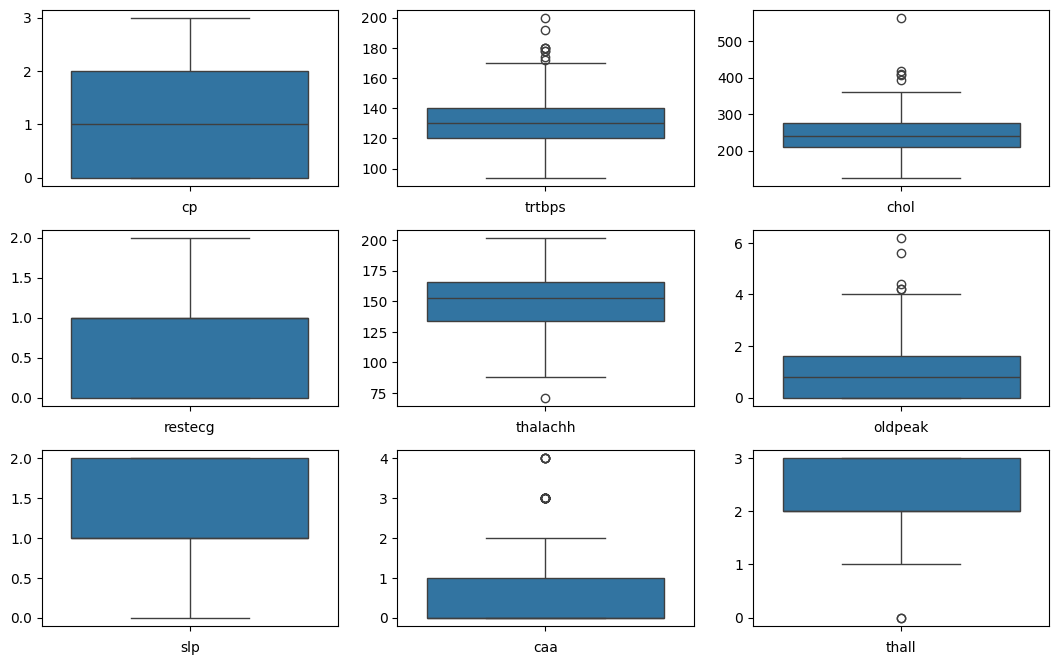

In [133]:
types   = data.nunique().reset_index()
columns = types.loc[types[types.columns[1]]>2]['index']

fig , ax = plt.subplots(3,3,figsize=(13,8))
fig.subplots_adjust(hspace=0.25)
for coluns , axis in  zip(columns.values[1:],ax.flatten()):
    sea.boxplot(data[coluns],ax=axis)
    axis.set_xlabel(coluns)
    axis.set_ylabel('')
plt.show()

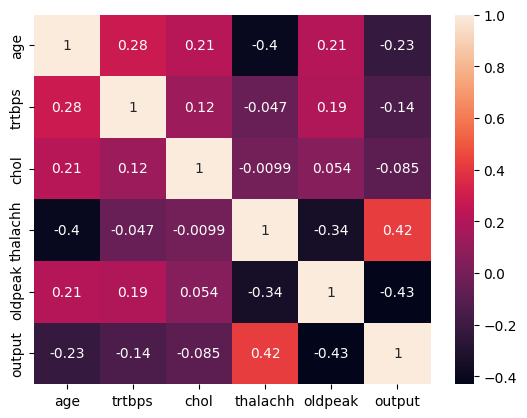

In [134]:
sea.heatmap(data[num].corr(),annot=True)
plt.show()

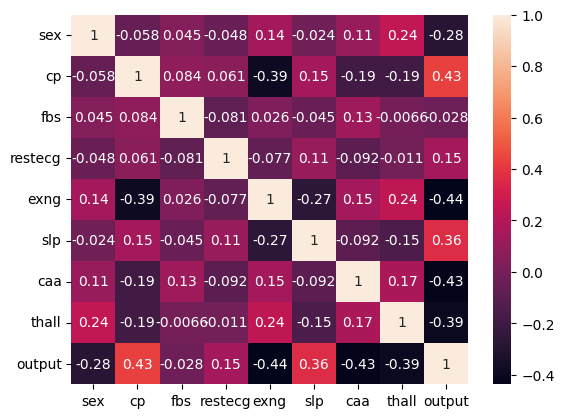

In [135]:
sea.heatmap(data[cat].corr('kendall'),annot=True)
plt.show()

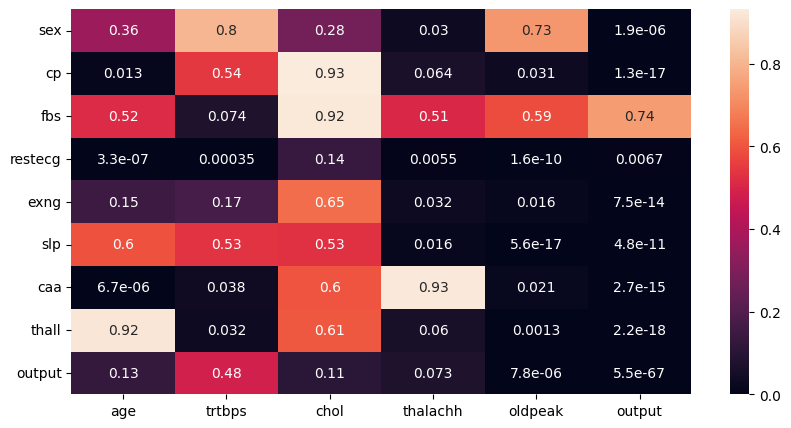

In [136]:
from scipy.stats import chi2_contingency
matrix = []
for i in cat:
    lista = []
    for j in num:    
        
        cross = pd.crosstab(data[i],data[j])
        chi , p ,_ ,_ = chi2_contingency(cross)
        lista.append(p)
  
    matrix.append(lista)
plt.figure(figsize=(10,5))
sea.heatmap(pd.DataFrame(data=matrix,columns=num,index=cat),annot=True)
plt.show()

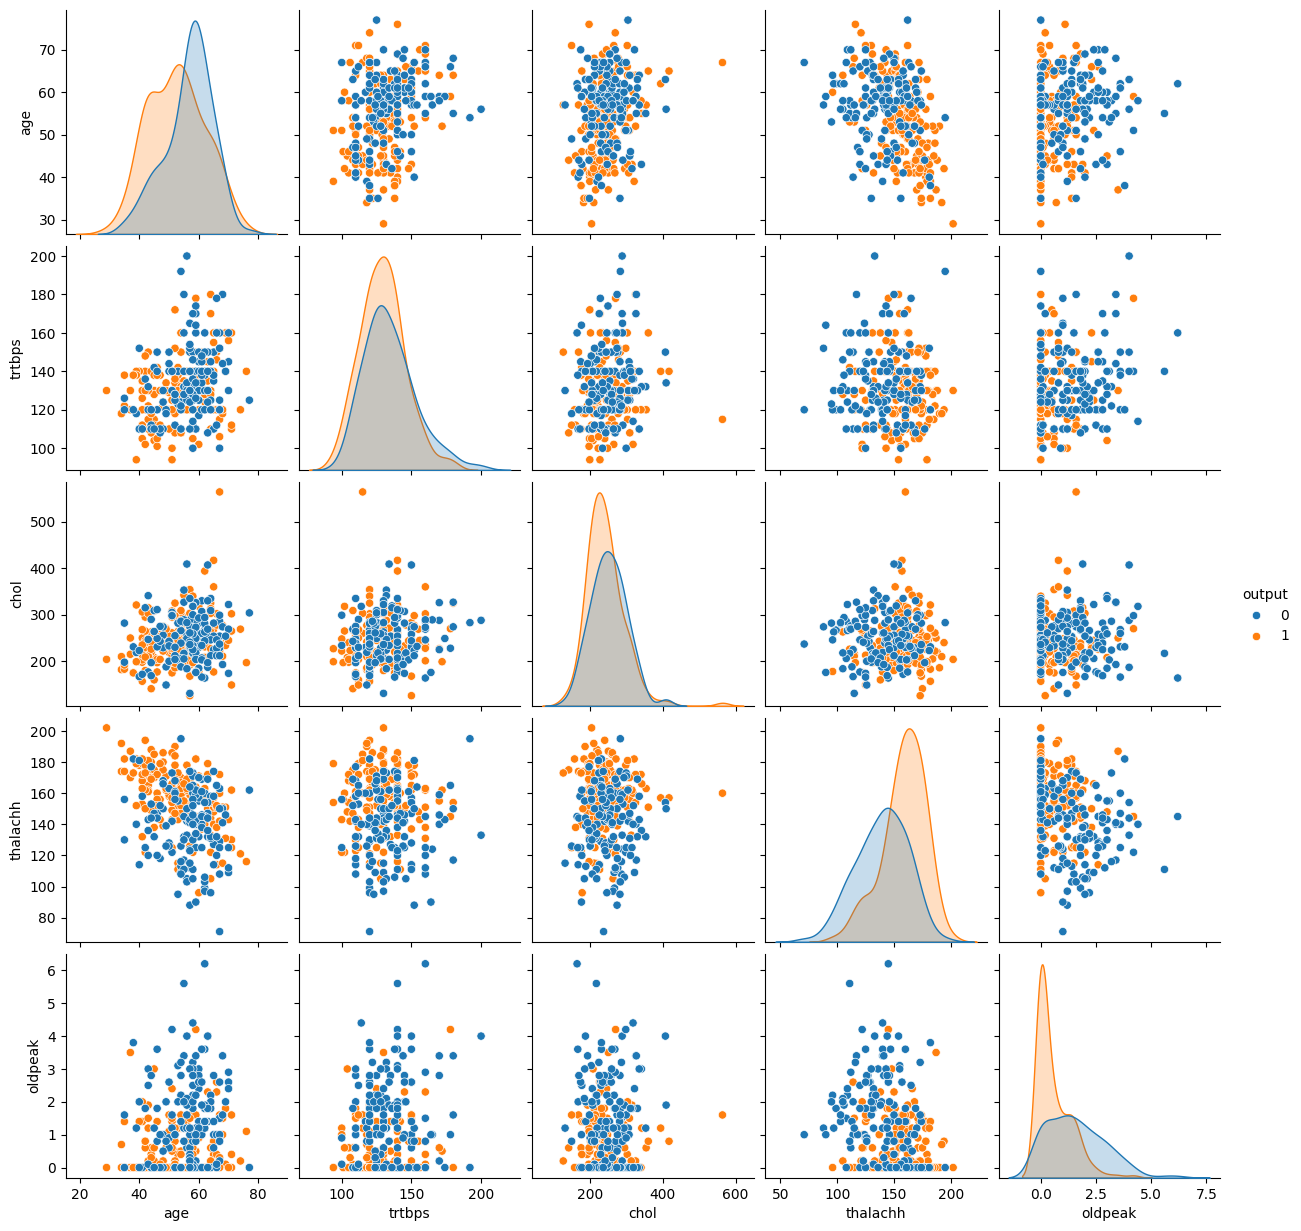

In [137]:
sea.pairplot(data[num],hue='output')
plt.show()

### Preprocessamento

In [208]:
from sklearn.pipeline        import Pipeline
from sklearn.base            import BaseEstimator,TransformerMixin
from sklearn.preprocessing   import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model    import LogisticRegression,SGDClassifier
from sklearn.ensemble        import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics         import *

In [139]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import RandomOverSampler

In [140]:
class Padronizacao(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):  
        if ( type(self.columns) == list ):
            X[self.columns]   = StandardScaler().fit_transform(X[self.columns])
        else:
            X[[self.columns]] = StandardScaler().fit_transform(X[[self.columns]])
        return X
    
class Dummies(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):
        return pd.get_dummies(X,columns=self.columns,dtype=int)

In [141]:
pipeline = Pipeline(
    steps=[
        ('Dummies'     ,Dummies(cat[:len(cat)-1])),
        ('Padronizacao',Padronizacao(num[:len(num)-1]))
    ]
)
dataset = pipeline.fit_transform(data)

In [142]:
X = dataset.drop(columns=['output'],axis=0)
y = dataset['output']
y.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [143]:
X, y = RandomOverSampler(random_state=42).fit_resample(X,y)
X, y = RandomUnderSampler(sampling_strategy={0:160,1:160},random_state=42).fit_resample(X,y)

In [144]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=42,train_size=0.2)

In [145]:
dataset.head(2)

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


&nbsp;

### Logistic Regression

In [146]:
params = dict(
    l1_ratio = np.around(np.linspace(0.1,0.9,15),3),
    max_iter = [950,1000,1100]
)
gridLog = GridSearchCV(estimator=LogisticRegression(penalty='elasticnet',solver='saga'),param_grid=params,scoring='accuracy')
gridLog.fit(xtrain,ytrain)
print(gridLog.best_estimator_)
print(gridLog.best_score_)

LogisticRegression(l1_ratio=0.1, max_iter=950, penalty='elasticnet',
                   solver='saga')
0.8256410256410257


In [147]:
logistic = gridLog.best_estimator_
logistic.fit(xtrain,ytrain)

LogisticRegression(l1_ratio=0.1, max_iter=950, penalty='elasticnet',
                   solver='saga')

In [148]:
predLog = logistic.predict(xtest)

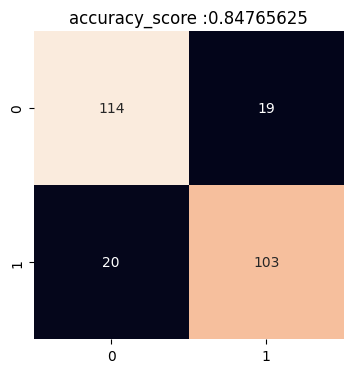

In [149]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predLog), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predLog)}')
plt.show()

In [150]:
print(classification_report(ytest,predLog))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       133
           1       0.84      0.84      0.84       123

    accuracy                           0.85       256
   macro avg       0.85      0.85      0.85       256
weighted avg       0.85      0.85      0.85       256



In [176]:
cross_val_score(logistic,X,y,scoring='accuracy',cv=5)

array([0.828125, 0.84375 , 0.875   , 0.859375, 0.90625 ])

&nbsp;

### MLP

In [151]:
from tensorflow import keras

2023-12-16 20:56:31.912443: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 20:56:32.144062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 20:56:32.144199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 20:56:32.180454: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 20:56:32.266589: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 20:56:32.267542: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [183]:
model = keras.models.Sequential()
model.add(
    keras.layers.Dense(30))
model.add(
    keras.layers.Dense(15,activation='relu'))
model.add(
    keras.layers.Dense(15,activation='relu'))
model.add(
    keras.layers.Dense(1,activation='sigmoid'))

compile = model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=100,batch_size=10)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.6416 - accuracy: 0.6719
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6875
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6875
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6875
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.6875
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.6875
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.6875
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7656
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5598 - accuracy: 0.7500
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7812
Epoch 11/100
7/7 [===========

In [184]:
predKeras = model.predict(xtest)>=0.5

8/8 [==============================] - 0s 1ms/step


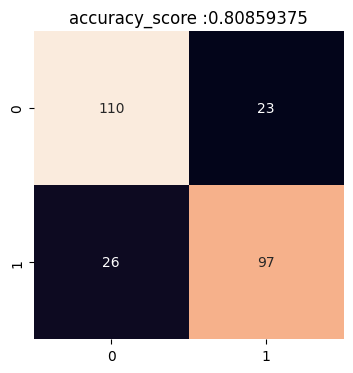

In [185]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predKeras), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predKeras)}')
plt.show()

In [186]:
print(classification_report(ytest,predKeras))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       133
           1       0.81      0.79      0.80       123

    accuracy                           0.81       256
   macro avg       0.81      0.81      0.81       256
weighted avg       0.81      0.81      0.81       256



&nbsp;

### Decision Tree 

In [257]:
params = dict(
    max_depth = [5,6],
    max_features = [18,20,24,25],
    max_leaf_nodes = [30,40,50,60], 
)
gridTree = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy')
gridTree.fit(xtrain,ytrain)

print(gridTree.best_estimator_)
print(gridTree.best_score_)

RandomForestClassifier(max_depth=5, max_features=20, max_leaf_nodes=40)
0.7961538461538462


In [258]:
tree = gridTree.best_estimator_
tree.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_features=20, max_leaf_nodes=40)

In [259]:
predTree = tree.predict(xtest)

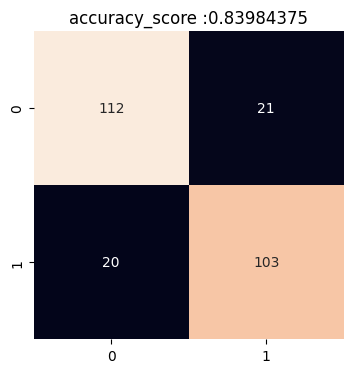

In [260]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predTree), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predTree)}')
plt.show()

In [261]:
print(classification_report(ytest,predTree))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       133
           1       0.83      0.84      0.83       123

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



In [262]:
cross_val_score(tree,X,y,scoring='accuracy',cv=5)

array([0.828125, 0.796875, 0.84375 , 0.796875, 0.859375])

&nbsp;

### SGBClassifier

In [198]:
params = dict(
    alpha = np.linspace(0.0001,0.2,15),
    loss  = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    eta0  = np.around( np.linspace(0.1,0.9,9),10),
)
gridGrad = GridSearchCV(estimator=SGDClassifier(max_iter=2000),param_grid=params,scoring='accuracy')
gridGrad.fit(xtrain,ytrain)

print(gridGrad.best_estimator_)
print(gridGrad.best_score_)

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

SGDClassifier(alpha=0.02865714285714286, eta0=0.1, loss='log_loss',
              max_iter=2000)
0.8576923076923076


In [199]:
grad = gridGrad.best_estimator_
grad.fit(xtrain,ytrain) 

SGDClassifier(alpha=0.02865714285714286, eta0=0.1, loss='log_loss',
              max_iter=2000)

In [200]:
predGrad = grad.predict(xtest)

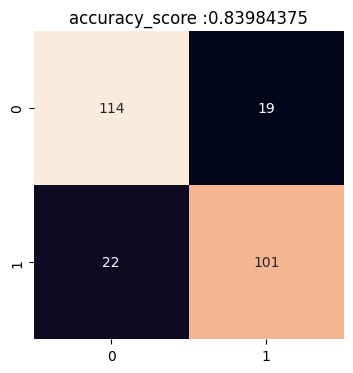

In [201]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predGrad), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predGrad)}')
plt.show()

In [202]:
print(classification_report(ytest,predGrad))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       133
           1       0.84      0.82      0.83       123

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



In [196]:
cross_val_score(grad,X,y,scoring='accuracy',cv=5)

array([0.796875, 0.78125 , 0.875   , 0.8125  , 0.90625 ])

&nbsp;

### Ensemble

In [263]:
voting = VotingClassifier(
    estimators=[
        ('Log' ,logistic),
        ('Grad',grad    ),
        ('tree',tree)
    ],
    voting='soft'
)
voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('Log',
                              LogisticRegression(l1_ratio=0.1, max_iter=950,
                                                 penalty='elasticnet',
                                                 solver='saga')),
                             ('Grad',
                              SGDClassifier(alpha=0.02865714285714286, eta0=0.1,
                                            loss='log_loss', max_iter=2000)),
                             ('tree',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=20,
                                                     max_leaf_nodes=40))],
                 voting='soft')

In [264]:
predVoting = voting.predict(xtest)

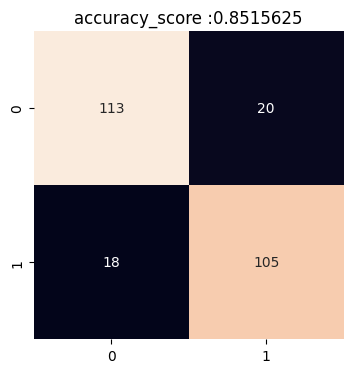

In [265]:
plt.figure(figsize=(4,4))
sea.heatmap( confusion_matrix(ytest,predVoting), annot=True ,cbar=False,fmt='')
plt.title(f'accuracy_score :{accuracy_score(ytest,predVoting)}')
plt.show()

In [266]:
print(classification_report(ytest,predVoting))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       133
           1       0.84      0.85      0.85       123

    accuracy                           0.85       256
   macro avg       0.85      0.85      0.85       256
weighted avg       0.85      0.85      0.85       256



In [267]:
cross_val_score(voting,X,y,scoring='accuracy',cv=5)

array([0.84375 , 0.84375 , 0.875   , 0.828125, 0.90625 ])